In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("mnist_train.csv")

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df=df.values

In [5]:
X=df[:,1:]
Y=df[:,0]

In [6]:
X.shape

(60000, 784)

In [7]:
Y.shape

(60000,)

In [8]:
split=int(0.8*X.shape[0])

In [9]:
split

48000

In [10]:
X_train,Y_train=X[:split,:],Y[:split]
X_test,Y_test=X[split:,:],Y[split:]

In [11]:
X_train.shape

(48000, 784)

In [12]:
X_test.shape

(12000, 784)

In [13]:
def drawIMG(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

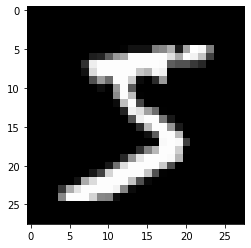

5


In [14]:
drawIMG(X_train[0])
print(Y_train[0])

KNN MODEL

In [52]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,query_point,k):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=distance(X[i],query_point)
        vals.append((d,Y[i]))  #making a tuple with distance and corresponding labels
    
    vals=sorted(vals) #will sort distance in ascending order
    vals=vals[:k]
    vals=np.array(vals)
    
    new_vals=np.unique(vals[:,1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

def accuracy(X_train,X_test,Y_test_labels):
    m=X_train.shape[0]
    n=X_test.shape[0]
    k=int(np.sqrt(m))
    pred_list=[]
    for i in range(n):
        pred=knn(X,Y,X_test[i],k)
        pred_list.append(pred)
        
    pred_list=np.array(pred_list)   #converting into numpy array to compare with Y_test
    
    #return (float((pred_list==Y_test_labels).sum())/n)*100
    #a=(float((Y_test==pred_list).sum())/n)*100
    return pred_list
    
    
    
    
    

In [ ]:
#acc=accuracy(X_train,X_test[:5],Y_test)
pred_list=accuracy(X_train,X_test,Y_test)
print(pred_list) 


In [49]:
count=0
for i in range(y_tst.shape[0]):
    if(pred_list[i]==Y_test[i]):
        count+=1
    acc=(count/y_tst.shape[0])*100    

In [50]:
y_tst=Y_test[:5]
print(y_ts)
pred_list[0]


[4 7 8 8 5]


4.0